# Hypothesis testing

I'm again using a selection from a data set with [Google Play apps](https://www.kaggle.com/lava18/google-play-store-apps/home). There are a few more columns this time.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind #Scipy is a package for scientific Python. We need it for the t-test

df = pd.read_csv('googleplay.csv')
df.head()

,app,installs,type,content,genre,version,reviews,rating,size,price
0,Diário Escola Mestres EF,"1,000+",Free,Everyone,Education,4.0 and up,11,NaN,6.6,0.0
1,WeFi - Free Fast WiFi Connect & Find Wi-Fi Map,"1,000,000+",Free,Everyone,Communication,4.0 and up,13469,4.0,5.1,0.0
2,Discovery K!ds Play! Español,"1,000,000+",Free,Everyone,Entertainment;Music & Video,4.0.3 and up,11263,4.2,35.0,0.0
3,Skyscanner,"10,000,000+",Free,Everyone,Travel & Local,4.4 and up,481546,4.5,29.0,0.0
4,Skyscanner,"10,000,000+",Free,Everyone,Travel & Local,4.4 and up,481546,4.5,29.0,0.0


Let's say you have the hypothesis that paid apps are rated differently than free apps. On the one hand, people have paid for them - presumably they thought it was worth the money. On the other hand, they might be more critical because they paid money. 

Let's first plot the two distributions together. Remember, it's always a good idea to plot your data before you do analysis!

[There is a nice page](https://seaborn.pydata.org/tutorial/categorical.html) from the Seaborn documentation showing different plots that you can use with categorical/qualitative data. Let's start with a "swarm plot". This is the standard when you use Seaborn's `catplot`.

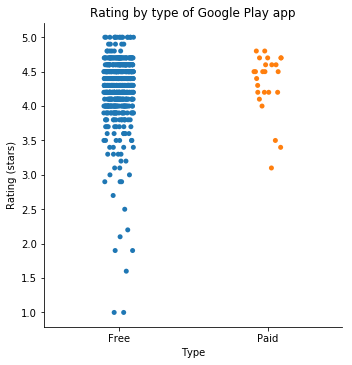

In [2]:
#Note that we are using the data= syntax, which allows us to use the columns as arguments
sns.catplot(x='type',y='rating',data=df)
plt.title('Rating by type of Google Play app')
plt.ylabel('Rating (stars)')
plt.xlabel('Type')
plt.show() #We can leave this out, but if we do the last line of code is shown inside the Notebook

Some interesting things to conclude here. First of all, there aren't that many paid apps in the data set. Secondly, the top of the distribution looks pretty similar. However, there are some really crappy free apps, but no really poor paid apps (at least not in this data set).


Let's make a violin plot to get an estimate of the underlying distribution of the population.

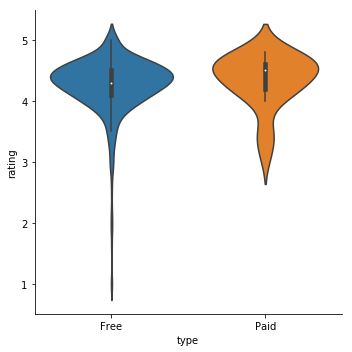

In [3]:
sns.catplot(x="type", y="rating", kind="violin", data=df)
plt.show()

The two estimated distributions look similar, but there are two key differences:
* Like we noted, some free apps score pretty poorly
* The mode and median of the paid apps seem to be higher


Let's calculate the means:

In [4]:
paid = df[df['type']=='Paid'] #this gets us a dataframe with only the paid apps
free = df[df['type']=='Free'] #ditto for the free apps

paid_mean = paid['rating'].mean()
free_mean = free['rating'].mean()
print(f'The mean rating for paid apps is {paid_mean}')
print(f'The mean rating for free apps is {free_mean}')

The mean rating for paid apps is 4.332
The mean rating for free apps is 4.259964726631393


So we know the means of the sample. However, there are many more apps on Google Play that are not included in the data set. Let's do a hypothesis test of the differences in *population means*. The hypotheses are:

* H0: the (population) mean rating is the same
* H1: the (population) mean rating is different

The test we need is a t-test: a difference in sample means (actually, one could argue whether all assumptions of the t-test hold; but for now, let's ignore that).

We are doing a so-called "independent t-test", which means that the ratings of the free and paid apps are from different units (apps). A "dependent t-test" would be when the ratings are from the same unit (app).

In [5]:
#We are doing an independent t-test (ttest_ind) (see above)
#We compare the values in the 'rating' colum
#By using the argument nan_policy we are telling Python to drop the NA's (otherwise, we would get an error)
ttest_ind(paid['rating'], free['rating'], nan_policy='omit') 

Ttest_indResult(statistic=0.74875846810611291, pvalue=0.45430118609171444)

The t-statistic is 0.75. The t-statistic by itself is not very meaningful. The p-value, however, gives us the probability of this kind of difference (or bigger) occurring under the null hypothesis of no difference. It's pretty big (p > 0.05), which means that this kind of dfference in the sample is actually not that unlikely.

So, we conclude by keeping H0: we continue to assume that the the population means are not different.

It might be, that given more evidence (enough paid apps in our sample), we would have reason to reject H0. But for now, we can keep H0.

If the p-value were below 0.05, we would conclude that H0 is likely false and H1 is true: the means are not the same (the mean rating for paid apps is higher).


Hello, this is a _Markdown_ cell